***IMPORTING THE REQUIRED LIBRARIES***

In [64]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
import math
import numpy as np
import matplotlib.pyplot as plt

***LOAD THE DATASET***

In [65]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

***SHAPE OF DATA SET*** 

In [91]:
print ("SHAPE OF TRAINING INPUT DATA AND OUTPUT DATA ")
print(x_train.shape)
print(y_train.shape)
print ("\nSHAPE OF TEST INPUT DATA AND OUTPUT DATA ")
print(y_test.shape)
print(x_test.shape)

SHAPE OF TRAINING INPUT DATA AND OUTPUT DATA 
(60000, 784)
(60000,)

SHAPE OF TEST INPUT DATA AND OUTPUT DATA 
(10000,)
(10000, 784)


***RESHAPING OF DATA SET***

In [68]:
#flattening
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

***PRINTING DATASET AFTER RESHAPING***

In [69]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


***DISPLAY THE DATASE***T

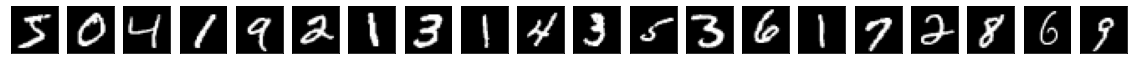

In [70]:
import matplotlib.pyplot as plt

n = 20  # how many digits we will display
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

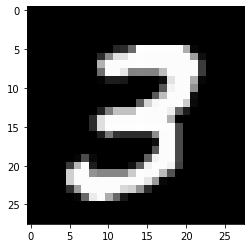

In [71]:
XX_train = x_train.astype('float32') / 255.
XX_test = x_test.astype('float32') / 255.
plt.imshow(XX_train[7].reshape(28,28))

***RESHAPE DATA FOR 10 CLASSES***



In [90]:


XX_train = XX_train.T
XX_test = XX_test.T
Y_train = to_categorical(y_train, num_classes=10).T
Y_test = to_categorical(y_test, num_classes=10).T

print("SHAPE OF TRAINING INPUT DATA AND OUTPUT DATA:")
print(XX_train.shape)
print(Y_train.shape)
print("\nSHAPE OF TESTING INPUT DATA AND OUTPUT DATA:")
print(XX_test.shape)
print(Y_test.shape)

SHAPE OF TRAINING INPUT DATA AND OUTPUT DATA:
(784, 60000)
(10, 60000)

SHAPE OF TESTING INPUT DATA AND OUTPUT DATA:
(784, 10000)
(10, 10000)


***SOFTMAX FUNCTION***

In [73]:
def softmax(Z):
	expZ = np.exp(Z - np.max(Z))
	return expZ / expZ.sum(axis=0, keepdims=True)

***PARAMETER INITILIZATION***

In [74]:
def initialize_param(d):
    np.random.seed(1)
    w = np.random.randn(d,10)/np.sqrt(d)
    b = np.zeros((10,1))
    params = {'w':w, 'b':b}
    return params

***FORWARD PASS***

In [75]:
def forward(params, X, Y):
    w = params['w']
    b = params['b']
    A = softmax(np.dot(w.T,X) + b)
    m = X.shape[1]
    cost = (-1/m)*np.sum(Y * np.log(A + 1e-8))
    return A, cost

***BACK PROPOGATION***

In [76]:
def backprop(X, Y, A):
    m = X.shape[1]
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)
    return dw, db


***OPTIMISATION FUNCTION***

In [86]:
def optimize(params, X, Y, num_iterations, learning_rate):
    w = params['w']
    b = params['b']

    costs = []
    for i in range(num_iterations):
        A, cost = forward(params, X, Y)
        dw, db = backprop(X, Y, A)

        params['w'] = params['w'] - learning_rate*dw
        params['b'] = params['b'] - learning_rate*db
        if i%100 == 0:
            print('COST ON {} ITERATION : COST : {}, NORMALISED WEIGHT: {}, BIAS: {}'.format(i, cost, np.linalg.norm(dw), db))
        costs.append(cost)
    return params, costs

***PREDICTION***

In [87]:
def predict(params, X):
    w = params['w']
    print(w.shape, X.shape)
    b = params['b']
    m = X.shape[1]
    A = softmax(np.dot(w.T,X)+b)
    return A


***COMPLETE MODEL***

In [93]:
def model(d, X_train, Y_train, X_test, Y_test, num_iter, learning_rate):
        params = initialize_param(d)
        print(params["w"].shape,"PARAMETER WEIGHT SHAPE")
        params,costs = optimize(params, X_train, Y_train, num_iter, learning_rate)
        return params,costs

***TRAINING AND TESTING THE MODEL***

In [94]:
params,costs = model(784, XX_train, Y_train, XX_test, Y_test, 1000, 0.1)

(784, 10) PARAMETER WEIGHT SHAPE
COST ON 0 ITERATION : COST : 2.436488226563119, NORMALISED WEIGHT: 1.1366058666201924, BIAS: -2.8776980798284056e-17
COST ON 100 ITERATION : COST : 0.6140793499129977, NORMALISED WEIGHT: 0.14731918378778483, BIAS: 2.220446049250313e-18
COST ON 200 ITERATION : COST : 0.4934911939243358, NORMALISED WEIGHT: 0.08265392383436176, BIAS: 7.105427357601002e-19
COST ON 300 ITERATION : COST : 0.4445869523096169, NORMALISED WEIGHT: 0.05938195955176011, BIAS: 1.2434497875801753e-18
COST ON 400 ITERATION : COST : 0.4166164790036122, NORMALISED WEIGHT: 0.0471843013929549, BIAS: 4.440892098500626e-19
COST ON 500 ITERATION : COST : 0.3979535328842856, NORMALISED WEIGHT: 0.03958973920139576, BIAS: -3.552713678800501e-19
COST ON 600 ITERATION : COST : 0.38435610251548524, NORMALISED WEIGHT: 0.03436324055036924, BIAS: -7.105427357601002e-19
COST ON 700 ITERATION : COST : 0.3738704917424687, NORMALISED WEIGHT: 0.030522324764162823, BIAS: -1.8355687340469255e-18
COST ON 800

***RESULT***

In [95]:

print('SHAPE OF TRAINING DATASET')
print("TRAINING ACCURACY  : {} %".format(100 - np.mean(np.abs(predict(params,XX_train) - Y_train)) * 100))
print('\nSHAPE OF TESTING DATASET')
print("TESTING ACCURACY   : {} %".format(100 - np.mean(np.abs(predict(params,XX_test) - Y_test)) * 100))

SHAPE OF TRAINING DATASET
(784, 10) (784, 60000)
TRAINING ACCURACY  : 96.20347450041757 %

SHAPE OF TESTING DATASET
(784, 10) (784, 10000)
TESTING ACCURACY   : 96.35049632816649 %



***PLOT***

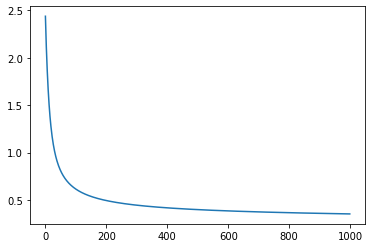

In [96]:
plt.plot(range(len(costs)),costs)